<a href="https://colab.research.google.com/github/mksantos2/information-retrieval-assignments/blob/main/(Avalia%C3%A7%C3%A3o)_IR_Trabalho_1_PyTerrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação de um Sistema de Recuperação de Informações: *PyTerrier*
-------------------------------------
*Notebook desenvolvido por Lana e Moniele.*

#### Sobre o PyTerrier 

*Esse framework propõe diferentes pipelines utilizando Classes Python para tarefas de Recuperação de Informações, como recuperação, reclassificação do Learn-to-Rank, reescrita da consulta, indexação, extração dos recursos subjacentes e reclassificação neural. Um sistema de recuperação de informações end-to-end pode ser facilmente construído com esses elementos de pipeline pré-estabelecidos. Além disso, uma arquitetura IR construída pode ser escalada ou estendida no futuro de acordo com os requisitos.*

Documentação: https://pyterrier.readthedocs.io/en/latest/

Artigo publicado: https://arxiv.org/abs/2007.14271 


A arquitetura de recuperação do PyTerrier é baseada em três conceitos:

- Pandas Dataframes com tipos predefinidos (cada um com um conjunto mínimo de atributos conhecidos).
- a transformação desses dataframes por operações padrão de recuperação de informações, definidas como transformers.
- a combinação de transformers, que apoiadas pelos seus operadores definidos, podem fornecer pipelines complexos de recuperação.

Em essência, um transformer PyTerrier é uma classe com um método transform(), que recebe como entrada um dataframe e o altera antes de retorná-lo.




## Dependências para utilizar o PyTerrier: 

- Instalar o framework via `pip install python-terrier`
- O pyterrier precisa ter a versão 11 do Java para funcionar, portanto se o notebook for rodado localmente é necessário ter o `JAVA_HOME` nas variáveis de ambiente.
- Além disso, é requisito executar o comando `pt.init()` antes de utilizar qualquer outra função ou classe do pyterrier.

In [1]:
!pip install python-terrier
#!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

     |████████████████████████████████| 95 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 17.2 MB/s 
     |████████████████████████████████| 69 kB 6.6 MB/s 
     |████████████████████████████████| 222 kB 50.3 MB/s 
     |████████████████████████████████| 294 kB 47.9 MB/s 
     |████████████████████████████████| 636 kB 48.5 MB/s 
     |████████████████████████████████| 6.3 MB 50.9 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 126 kB 56.8 MB/s 
     |████████████████████████████████| 1.8 MB 42.1 MB/s 
     |████████████████████████████████| 291 kB 25.3 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.7.0-py3-none-any.whl size=102213 sha256=c3999dfa9a850f5dce2a5ca590dfca5b6a8f29d7262f15b1189c65b24fbd0a65
  Stored in directory: /root/.cache/pip/wheels/e3/84/1e/68c08f14e2481e2b3e7c1a2c24bb1220712bc3f5d3896c28df
  Created wheel for ir-measures: filen

*Iniciando o pyterrier...*

In [2]:
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.6  jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6  jar not found, downloading to /root/.pyterrier...
Done
PyTerrier 0.7.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)


### Carregando os Dados 

In [102]:
!wget https://www.dropbox.com/s/pkf3o7bxjp1lbde/qrels_FSP2021.txt?dl=0

--2021-10-07 21:23:51--  https://www.dropbox.com/s/pkf3o7bxjp1lbde/qrels_FSP2021.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pkf3o7bxjp1lbde/qrels_FSP2021.txt [following]
--2021-10-07 21:23:52--  https://www.dropbox.com/s/raw/pkf3o7bxjp1lbde/qrels_FSP2021.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc857caf3dd31385959934758319.dl.dropboxusercontent.com/cd/0/inline/BXkEj26vRNemxRcNio-XMED_Ona0LPX2nlc73Jhx4lhNaJaHZq7z3Pn5DID8IR4BnV506DumkhoHqoLM5jISmTEAI8tdSD33lXBmJPXwV1fwlQYig_PSzLiVt4gHyscE5kv-ABui55yhx7Dm0vIRTKck/file# [following]
--2021-10-07 21:23:52--  https://uc857caf3dd31385959934758319.dl.dropboxusercontent.com/cd/0/inline/BXkEj26vRNemxRcNio-XMED_Ona0LPX2nlc73Jhx4lhNaJaHZq7z3Pn5DID8IR4BnV506D

In [3]:
!wget https://www.dropbox.com/s/va44q299g0edx34/collection.zip?dl=0

--2021-10-07 17:47:32--  https://www.dropbox.com/s/va44q299g0edx34/collection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va44q299g0edx34/collection.zip [following]
--2021-10-07 17:47:32--  https://www.dropbox.com/s/raw/va44q299g0edx34/collection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc18046aedc8eb9ee13dfaef3827.dl.dropboxusercontent.com/cd/0/inline/BXlCOh9Gv42jFvKyPxWejo1xmqYuoZo92fFn-owtFCrUMDLQQyBJXREwTfS88RDOaI1lmZ1k62fVdCyp5vqUPxhI7OeKGYun_kB1_pGnwlYsvEES3kR1WCkSbsura7YOaApjLVv0Qj8xOpqUb6dUE4H8/file# [following]
--2021-10-07 17:47:32--  https://uc18046aedc8eb9ee13dfaef3827.dl.dropboxusercontent.com/cd/0/inline/BXlCOh9Gv42jFvKyPxWejo1xmqYuoZo92fFn-owtFCrUMDLQQyBJXREwTfS88RDOaI1lmZ1k62fVdCy

In [4]:
!unzip "/content/collection.zip?dl=0" -d "/content/collection" 

Archive:  /content/collection.zip?dl=0
  inflating: /content/collection/Consultas_UTF8.txt  
   creating: /content/collection/docs/
  inflating: /content/collection/docs/FSP.950101.sgml  
  inflating: /content/collection/docs/FSP.950102.sgml  
  inflating: /content/collection/docs/FSP.950103.sgml  
  inflating: /content/collection/docs/FSP.950104.sgml  
  inflating: /content/collection/docs/FSP.950105.sgml  
  inflating: /content/collection/docs/FSP.950106.sgml  
  inflating: /content/collection/docs/FSP.950107.sgml  
  inflating: /content/collection/docs/FSP.950108.sgml  
  inflating: /content/collection/docs/FSP.950109.sgml  
  inflating: /content/collection/docs/FSP.950110.sgml  
  inflating: /content/collection/docs/FSP.950111.sgml  
  inflating: /content/collection/docs/FSP.950112.sgml  
  inflating: /content/collection/docs/FSP.950113.sgml  
  inflating: /content/collection/docs/FSP.950114.sgml  
  inflating: /content/collection/docs/FSP.950115.sgml  
  inflating: /content/collec

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

Cria pasta onde serão armazenados os resultados

In [6]:
!mkdir results

# Indexação

Aqui estaremos utilizando o método `TRECCollectionIndexer` do PyTerrier para indexar os documentos.

 - `index_path` sinaliza o caminho onde ficará o índice.
 - `find_files()` busca de forma automática pelos documentos dentro do repositório especificado pelo caminho `files_path`.


In [7]:
index_path = "./index"
files_path = '/content/collection/docs'
files = pt.io.find_files(files_path)

!rm -rf ./index
indexer = pt.TRECCollectionIndexer(index_path, verbose=True)

Depois de criado, é feito um ajuste no índice, onde chamamos um tokenizador universal `UTFTokeniser` para tokenizar os textos em português. Também configuramos um stemmer para língua potuguesa chamado `PortugueseSnowballStemmer`.


In [8]:
indexer.setProperty("tokeniser", "UTFTokeniser") 
indexer.setProperty("termpipelines", "PortugueseSnowballStemmer")

Indexamos os documentos ao chamar o método `index()` dentro do objeto TRECCollectionIndexer.

In [9]:
indexref = indexer.index(files)

  0%|          | 0/365 [00:00<?, ?files/s]

In [10]:
indexref.toString()

'./index/data.properties'


É possível acessar informações sobre o índice, tais como as estatísticas do índice. Isso é feito através da chamada do método `getCollectionStatistics()`. Então podemos visualizar a quantidade de documentos, o número de termos, número de posting, etc.


In [11]:
index = pt.IndexFactory.of(indexref)
print(index.getCollectionStatistics().toString())

Number of documents: 52038
Number of terms: 96825
Number of postings: 10070943
Number of fields: 0
Number of tokens: 20643664
Field names: []
Positions:   false



## Recuperando Documentos Utilizando os Tópicos


*Carregando os tópicos*

O método `read_topics()` percorre o arquivo de tópicos e concatena o **título, descrição e narrativa** de cada tópico em uma única consulta.

In [13]:
topics_path = "/content/collection/Consultas_UTF8.txt"
topics = pt.io.read_topics(topics_path)
topics.head()

,qid,query
0,251,medicina alternativa encontrar documentos sobr...
1,252,sistemas de reforma e pensões na europa encont...
2,253,países com pena de morte em quais países ainda...
3,254,danos provocados por terramotos encontrar docu...
4,255,viciados na internet o uso frequente da intern...


In [14]:
print("O número total de tópicos é :", len(topics))

O número total de tópicos é : 50


# Baseline

## Rankeando Documentos com Stemming 

In [15]:
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "TF_IDF"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #19.57 
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DirichletLM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #29.90
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "BB2"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #40.57
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFIC"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #29.73
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFRee"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #42.03
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "DFReeKLIM"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #27.63
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "Js_KLs"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #40.69
retr = pt.BatchRetrieve(index, controls = {"wmodel": "LemurTF_IDF", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #98.98
#retr = pt.BatchRetrieve(index, controls = {"wmodel": "LGD"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #33.25

base_res_stem = retr.transform(topics)

17:49:46.393 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1


##Avaliação do Sistema

In [103]:
qrels_path=("/content/qrels_FSP2021.txt?dl=0")
qrels = pt.io.read_qrels(qrels_path)

### Avaliação da Baseline

In [104]:
pt.Utils.evaluate(base_res_stem,qrels)

{'map': 0.25888339189455617, 'ndcg': 0.4822207421524042}

Testando diferentes modelos de ranqueamento, com o mesmo tipo de QE.

In [18]:

retr_DPH = pt.BatchRetrieve(index, controls = {"wmodel": "DPH", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164

retr_BM25 = pt.BatchRetrieve(index, controls = {"wmodel": "BM25", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164

retr_DFR_BM25 = pt.BatchRetrieve(index, controls = {"wmodel": "DFR_BM25", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164

retr_LemurTF_IDF = pt.BatchRetrieve(index, controls = {"wmodel": "LemurTF_IDF", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164

retr_DFReeKLIM = pt.BatchRetrieve(index, controls = {"wmodel": "DFReeKLIM", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164


In [19]:
models_br = [retr_DPH, retr_BM25, retr_DFR_BM25, retr_LemurTF_IDF, retr_DFReeKLIM]

O método `Experiment` realiza todos os experimentos de recuperação dado um array com diferentes `BatchRetrieve`. Ele também calcula a Precisão Média (MAP) de cada modelo.

In [20]:
pt.Experiment(models_br, topics, qrels, ["map", "ndcg"])

17:49:59.874 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1
17:50:11.989 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1
17:50:24.498 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1
17:50:37.624 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1
17:50:48.192 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1


,name,map,ndcg
0,BR(DPH),0.291393,0.494308
1,BR(BM25),0.102313,0.253039
2,BR(DFR_BM25),0.103080,0.254106
3,BR(LemurTF_IDF),0.258883,0.482221
4,BR(DFReeKLIM),0.286805,0.481125


Escolhemos a função de ranking `DPH` para ser comparada a *baseline*, pois é a que teve um melhor desempenho na métrica de MAP.

In [88]:
# outra baseline para comparação
retr_DPH = pt.BatchRetrieve(index, controls = {"wmodel": "DPH", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'}) #164


In [89]:
pt.Utils.evaluate(retr_DPH.transform(topics),qrels)

20:14:04.961 [main] WARN org.terrier.querying.QueryExpansion - qemodel control not set for QueryExpansion post process. Using default model Bo1


{'map': 0.29139345818954315, 'ndcg': 0.4943076977869672}

# Learning to Rank

Como estaremos trabalhando com modelos de Aprendizado de Máquina, é importante fazer a separação dos tópicos em conjuntos de dados de **treino e teste**. Se treinássemos o modelo com todos dados teríamos uma visão excessivamente otimista visto que a avaliação ocorre em dados que já foram vistos pelo modelo. Por outro lado, fazendo essa separação estaremos tendo uma visão pessimista, em que o modelo não vai ter acesso aos dados de teste no seu treinamento. Isso tudo para quando o modelo for "posto em produção", aumente o potencial do modelo em generalizar o rankeamento de documentos ainda não vistos.

In [85]:
from sklearn.model_selection import train_test_split

train_topics, test_topics = train_test_split(topics, test_size=0.2, shuffle=True)

In [87]:
print(len(train_topics), len(test_topics))

40 10


### Regressor Random Forest da Biblioteca *Scikit-learn*


Esse pipeline utiliza a função `FeaturesBatchRetrieve` em que fazemos o reranqueamento com outros qmodels, nesse caso utilizamos TF_IDF e o PL2, e que depois será utilizado no learning ranking com Random Forest.

Na prática, esse pipeline possui 3 fases:
1. Ranqueamento com o modelo DPH
2. Re-ranqueamento utilizando as features ("TF_IDF" e "PL2")
3. Aplicando RandomForests


In [90]:
pipeline = pt.FeaturesBatchRetrieve(index,  features=["SAMPLE", "WMODEL:Tf", "WMODEL:PL2"], controls = {"wmodel": "DPH", "qe" : "on"}, properties={'tokeniser': 'UTFTokeniser', 'termpipelines': 'PortugueseSnowballStemmer'})

Aqui realizamos o experimento comparando as baselines (Lemur TF-IDF e DPH) com o learn-to-rank que utiliza um regressor Random Forest. Visto que o dataframe `qrels` possui todas as respostas de todos os tópicos, estamos configurando o parâmetro `filter_by_topics = True`, que removerá os tópicos do `qrels` que tem `qids` não aparecendo no dataframe de `topics`. Assim a avaliação será justa e aplicada apenas em cima dos tópicos dentro do dataframe de `test_topics`.

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, random_state=42)
rf_pipe = pipeline >> pt.ltr.apply_learned_model(rf)

rf_pipe.fit(train_topics, qrels)

valid_rf = pt.Experiment([retr_LemurTF_IDF, retr_DPH, rf_pipe], test_topics, qrels, ["map", "iprec_at_recall"], names=["LemurTF_IDF Baseline", "DPH Baseline", "Random Forest"], filter_by_topics=True)

In [93]:
valid_rf

,name,map,IPrec@0.0,IPrec@0.1,IPrec@0.2,IPrec@0.3,IPrec@0.4,IPrec@0.5,IPrec@0.6,IPrec@0.7,IPrec@0.8,IPrec@0.9,IPrec@1.0
0,LemurTF_IDF Baseline,0.387943,0.871212,0.827462,0.732725,0.571904,0.541766,0.363533,0.248442,0.199859,0.143772,0.074291,0.044535
1,DPH Baseline,0.454242,0.757143,0.732143,0.727597,0.641274,0.639001,0.520732,0.354223,0.307131,0.236378,0.144690,0.076406
2,Random Forest,0.227529,0.429326,0.404326,0.377811,0.319477,0.297867,0.253181,0.188412,0.154482,0.118704,0.063105,0.028565


**Observação:** esse MAP é feito apenas em cima de **20%** do tamanho total de tópicos.

## Plotagem dos Gráficos: Curvas de Revocação e Precisão

Remove as primeiras duas colunas do Dataframe da avaliação.

In [94]:
valid_rf.drop(columns=valid_rf.columns[0], axis=1, inplace=True)
valid_rf.drop(columns=valid_rf.columns[0], axis=1, inplace=True)

Transforma o dataframe em lista.

In [95]:
precisao_inter = valid_rf.values.tolist()

In [96]:
precisao_inter

[[0.8712121212121211,
  0.8274621212121211,
  0.732725279106858,
  0.5719041077969649,
  0.5417661633388944,
  0.3635329378628269,
  0.24844206240210243,
  0.19985866288369616,
  0.1437716521631776,
  0.07429129936896649,
  0.04453487796724314],
 [0.7571428571428571,
  0.7321428571428571,
  0.7275974025974026,
  0.6412741046831957,
  0.6390013774104684,
  0.5207319368548876,
  0.35422326034621116,
  0.30713083814692127,
  0.23637752651902694,
  0.14468976961441818,
  0.07640590370461273],
 [0.42932567432567426,
  0.4043256743256743,
  0.3778105228105228,
  0.31947730332369967,
  0.29786739620295666,
  0.2531810925316906,
  0.18841241131903205,
  0.15448189483456992,
  0.11870352252701606,
  0.06310489453012033,
  0.028564519848073223]]

Cria lista com os valores de revocação.

In [97]:
recall = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

Realiza a plotagem do gráfico com as curvas por abordagem.

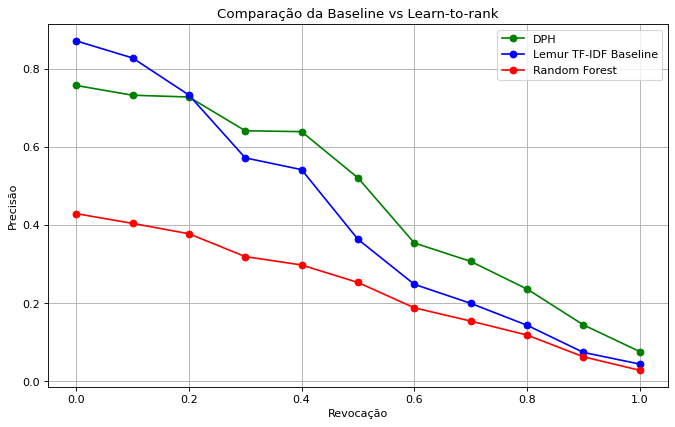

In [100]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
    
plt.plot(recall, precisao_inter[1], color='green', marker='o', label = 'DPH')
plt.legend()
plt.plot(recall, precisao_inter[0], color='blue', marker='o', label = 'Lemur TF-IDF Baseline')
plt.legend()
plt.plot(recall, precisao_inter[2], color='red', marker='o', label = 'Random Forest')
plt.legend()
plt.title('Comparação da Baseline vs Learn-to-rank' )
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()